In [6]:
import sys
from pathlib import Path

repo_root = Path("..").resolve()
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

from apclust import load_study_panels, StudyMatrices
import numpy as np
data_dir = repo_root / "Data"

mainz_panels = load_study_panels(data_dir / "mainz_dict.npy")
trans_panels = load_study_panels(data_dir / "transbig_dict.npy")
vdx_panels = load_study_panels(data_dir / "vdx_dict.npy")

hk_studies = StudyMatrices(
    mainz=mainz_panels["HK_3"],
    transbig=trans_panels["HK_3"],
    vdx=vdx_panels["HK_3"],
)

results_dir = repo_root / "Results"
affinity_dir = results_dir / "affinity_matrices"
sweeps_dir = results_dir / "ap_sweeps"
figures_dir = repo_root / "Figures" / "AP"

for path in (results_dir, affinity_dir, sweeps_dir, figures_dir):
    path.mkdir(parents=True, exist_ok=True)


In [3]:
from apclust import (
    compute_similarity_matrix,
    preference_grid,
    run_ap_grid,
    run_affinity_replicability,
    cluster_scatter_2d,
)

In [4]:
baseline = run_ap_grid(
    hk_studies.vdx,
    preferences=[None],      # sklearn default: median similarity
    dampings=[0.5],
    max_iter=200,
    convergence_iter=15,
    random_state=0,
    save_labels=True,
)
baseline.records

,preference,input_preference,damping,n_clusters,n_iter,converged,random_state,exemplars
0,-15.048569,None,0.5,16,31,True,0,"(25, 41, 42, 66, 116, 117, 130, 131, 151, 179,..."


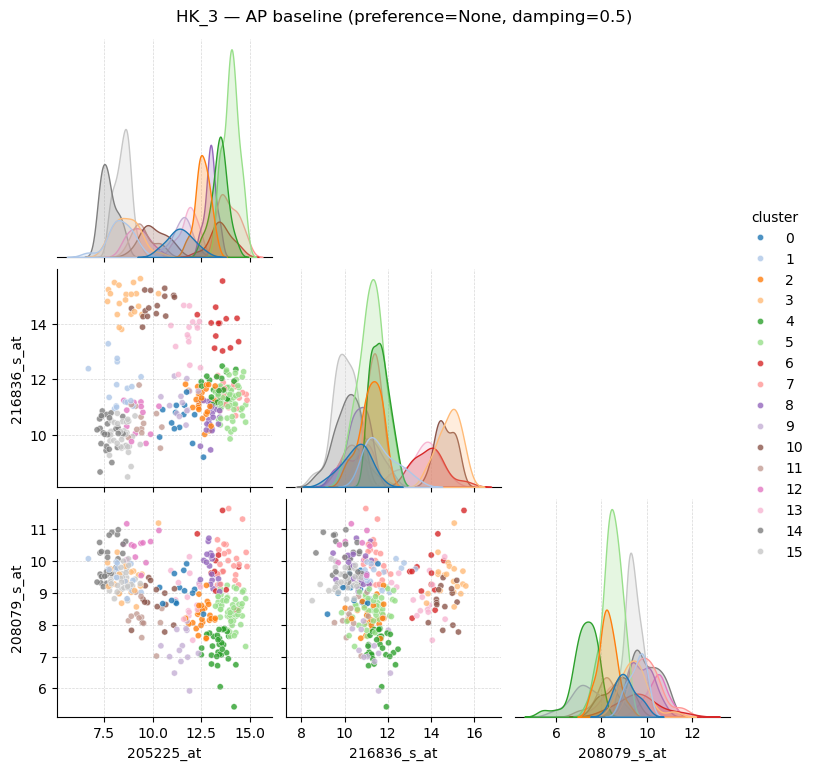

In [5]:
from apclust import plot_raw_gene_pairs
plot_raw_gene_pairs(
    hk_studies.vdx,
    baseline.labels[(None, 0.5)],
    title="HK_3 — AP baseline (preference=None, damping=0.5)",
)

In [6]:
hk_studies.vdx.feature_names

('205225_at', '216836_s_at', '208079_s_at')

In [7]:
from apclust import run_ap_grid, find_damping_limit, find_min_max_iter

# Step 1: locate highest damping that does converge with max_iter=200
damping_limit = find_damping_limit(
    hk_studies.vdx,
    preference=None,
    max_iter=200,
    step=0.05,   # coarse step
)
print("Largest convergent damping ≈", damping_limit)

# Step 2: check what happens just beyond the limit
test_damping = min(damping_limit + 0.01, 0.99)
baseline = run_ap_grid(
    hk_studies.vdx,
    preferences=[None],
    dampings=[test_damping],
    max_iter=200,
    convergence_iter=15,
    random_state=0,
    save_labels=False,
)
print("Damping", test_damping, "converged?", baseline.records.loc[0, "converged"])

# Step 3: find the minimum iteration budget for the safe damping
min_iter = find_min_max_iter(
    hk_studies.vdx,
    preference=None,
    damping=damping_limit,
    max_iter_cap=200,
)
print("Minimum max_iter at damping", damping_limit, "=", min_iter)

Largest convergent damping ≈ 0.99
Damping 0.99 converged? False


/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:162: ConvergenceWarning: Affinity propagation did not converge and this model will not have any cluster centers.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:162: ConvergenceWarning: Affinity propagation did not converge and this model will not have any cluster centers.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:162: ConvergenceWarning: Affinity propagation did not converge and this model will not have any cluster centers.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:162: ConvergenceWarning: Affinity propagation did not converge and this model will not have any cluster centers.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:162: ConvergenceWarning: Affinity propagation did not c

Minimum max_iter at damping 0.99 = 200


/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:162: ConvergenceWarning: Affinity propagation did not converge and this model will not have any cluster centers.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:162: ConvergenceWarning: Affinity propagation did not converge and this model will not have any cluster centers.
  warnings.warn(


## Mainz 

In [6]:
baseline = run_ap_grid(
    hk_studies.mainz,
    preferences=[None],
    dampings=[0.5],
    max_iter=200,
    convergence_iter=15,
    random_state=0,
    save_labels=True,
)
baseline.records

,preference,input_preference,damping,n_clusters,n_iter,converged,random_state,exemplars
0,-6.394521,None,0.5,14,26,True,0,"(4, 24, 36, 53, 62, 71, 72, 84, 95, 98, 162, 1..."


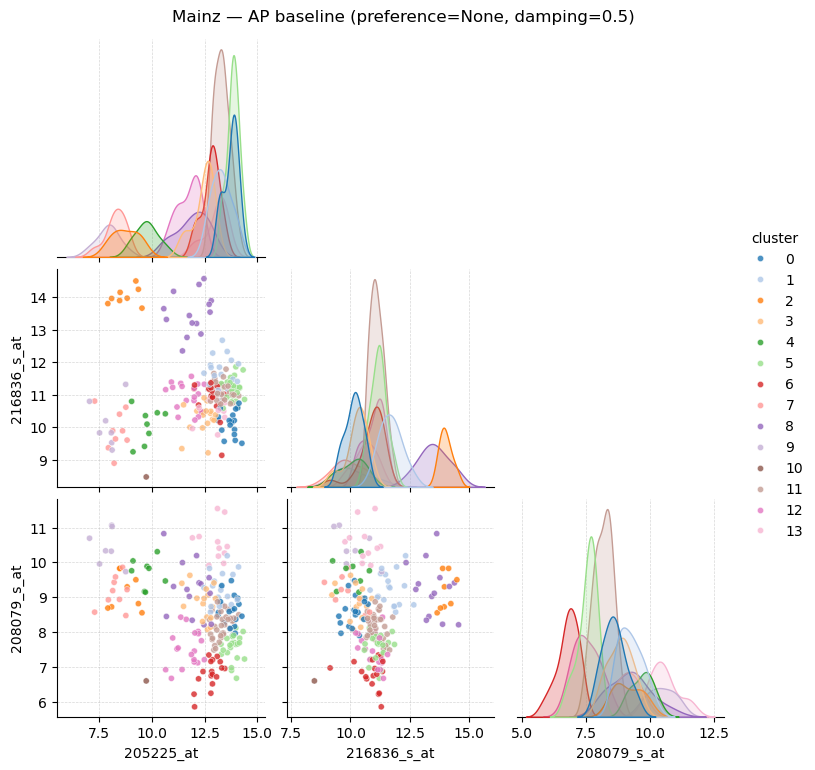

In [7]:
from apclust import plot_raw_gene_pairs
plot_raw_gene_pairs(
    hk_studies.mainz,
    baseline.labels[(None, 0.5)],
    title="Mainz — AP baseline (preference=None, damping=0.5)",
)

In [ ]:
# convergence failed when we upper bounded damping to 0.85; 

In [10]:
from apclust import run_ap_grid, find_damping_limit, find_min_max_iter

# Step 1: locate highest damping that does converge with max_iter=200
damping_limit = find_damping_limit(
    hk_studies.mainz,
    preference=None,
    max_iter=200,
    step=0.01,   # coarse step
)
print("Largest convergent damping ≈", damping_limit)

# Step 2: check what happens just beyond the limit
test_damping = min(damping_limit + 0.01, 0.99)
baseline = run_ap_grid(
    hk_studies.mainz,
    preferences=[None],
    dampings=[test_damping],
    max_iter=200,
    convergence_iter=15,
    random_state=0,
    save_labels=False,
)
print("Damping", test_damping, "converged?", baseline.records.loc[0, "converged"])

# Step 3: find the minimum iteration budget for the safe damping
min_iter = find_min_max_iter(
    hk_studies.mainz,
    preference=None,
    damping=damping_limit,
    max_iter_cap=200,
)
print("Minimum max_iter at damping", damping_limit, "=", min_iter)

Largest convergent damping ≈ 0.99
Damping 0.99 converged? True
Minimum max_iter at damping 0.99 = 17


/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [11]:
# # damping of 0.820 causes instability!
# import numpy as np
# from apclust import run_stability_probe

# probe = run_stability_probe(
#     hk_studies.mainz,
#     preference=None,
#     dampings=np.linspace(0.5, 0.820, 10),
#     max_iters=[50, 100, 150, 200],
# )

# probe[["damping", "max_iter_setting", "n_iter", "converged"]]

# Transbig

In [4]:
baseline = run_ap_grid(
    hk_studies.transbig,
    preferences=[None],      # sklearn default: median similarity
    dampings=[0.5],
    max_iter=200,
    convergence_iter=15,
    random_state=0,
    save_labels=True,
)
baseline.records

,preference,input_preference,damping,n_clusters,n_iter,converged,random_state,exemplars
0,-12.579091,None,0.5,14,30,True,0,"(8, 31, 52, 74, 106, 111, 123, 130, 131, 151, ..."


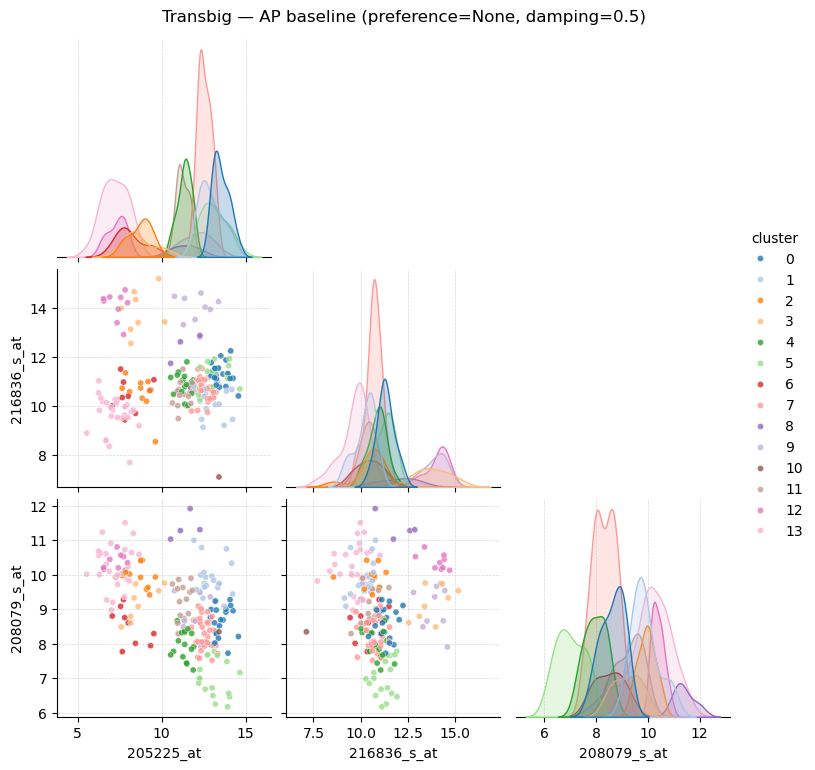

In [5]:
from apclust import plot_raw_gene_pairs
plot_raw_gene_pairs(
    hk_studies.transbig,
    baseline.labels[(None, 0.5)],
    title="Transbig — AP baseline (preference=None, damping=0.5)",
)

In [5]:
hk_studies.transbig.feature_names
# ('205225_at', '216836_s_at', '208079_s_at')

('205225_at', '216836_s_at', '208079_s_at')

In [ ]:
import numpy as np
from apclust import run_stability_probe

probe = run_stability_probe(
    hk_studies.mainz,
    preference=None,
    dampings=np.linspace(0.5, 0.820, 10),
    max_iters=[50, 100, 150, 200],
)


In [20]:
import numpy as np
from apclust import run_stability_probe

probe = run_stability_probe(
    hk_studies.mainz,
    preference=None,
    dampings=np.linspace(0.5, 0.6, 10),
    max_iters=[50, 100, 150, 200],
)
probe[["damping", "max_iter_setting", "n_iter", "converged"]]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


,damping,max_iter_setting,n_iter,converged
0,0.500000,50,26,True
0,0.500000,100,26,True
0,0.500000,150,26,True
0,0.500000,200,26,True
0,0.511111,50,37,True
0,0.511111,100,37,True
0,0.511111,150,37,True
0,0.511111,200,37,True
0,0.522222,50,26,True
0,0.522222,100,26,True


# outdated: swept over median 

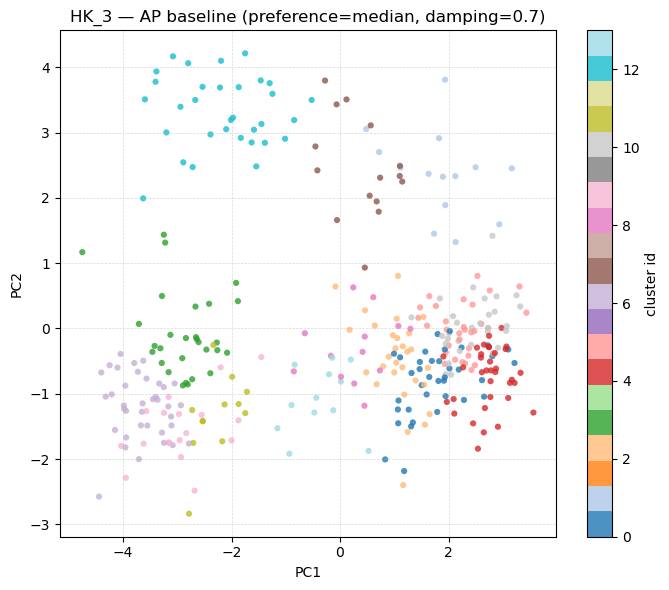

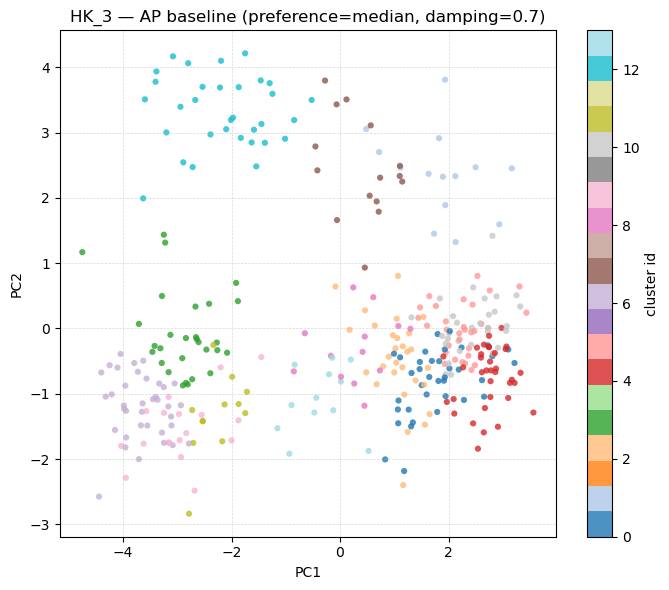

In [3]:
baseline_result = run_ap_grid(
    hk_studies.vdx,
    preferences=[None],  # median preference
    dampings=[0.7],
    save_labels=True,
)
baseline_result.records

cluster_scatter_2d(
    hk_studies.vdx,
    baseline_result.labels[(None, 0.7)],
    title="HK_3 — AP baseline (preference=median, damping=0.7)",
)

In [9]:
baseline_result.records[["preference", "damping", "n_clusters", "converged", "n_iter"]]

,preference,damping,n_clusters,converged,n_iter
0,-15.048569,0.7,14,True,47


In [4]:
sim_hk = compute_similarity_matrix(hk_studies.vdx)
np.save(affinity_dir / "hk3_vdx.npy", sim_hk)

prefs = preference_grid(sim_hk, quantiles=[0.1, 0.25, 0.5, 0.75, 0.9])
prefs

[-39.52414021356189,
 -29.012095583697842,
 -15.132567943848304,
 -4.627848116467674,
 -1.6871902359973487]

In [5]:
# sweep!
dampings = [0.7]  # widen later only if convergence issues appear
hk_grid = run_ap_grid(
    hk_studies.vdx,
    preferences=prefs,
    dampings=dampings,
    max_iter=200,
    convergence_iter=15,
    random_state=0,
    save_labels=False,
)
hk_grid.records.to_csv(sweeps_dir / "hk3_vdx.csv", index=False)

In [6]:
# inspect and plot 
hk_grid.records[["preference", "damping", "n_clusters", "converged", "n_iter"]]

,preference,damping,n_clusters,converged,n_iter
0,-39.524140,0.7,7,True,28
1,-29.012096,0.7,10,True,32
2,-15.132568,0.7,14,True,51
3,-4.627848,0.7,31,True,36
4,-1.687190,0.7,54,True,73


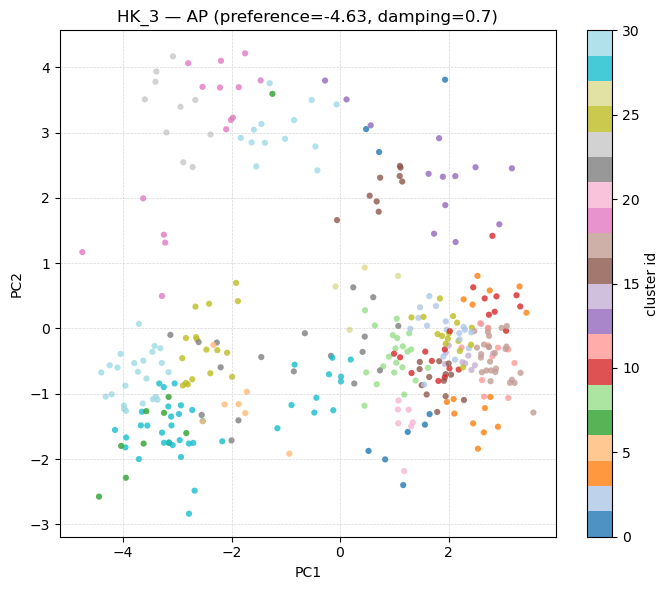

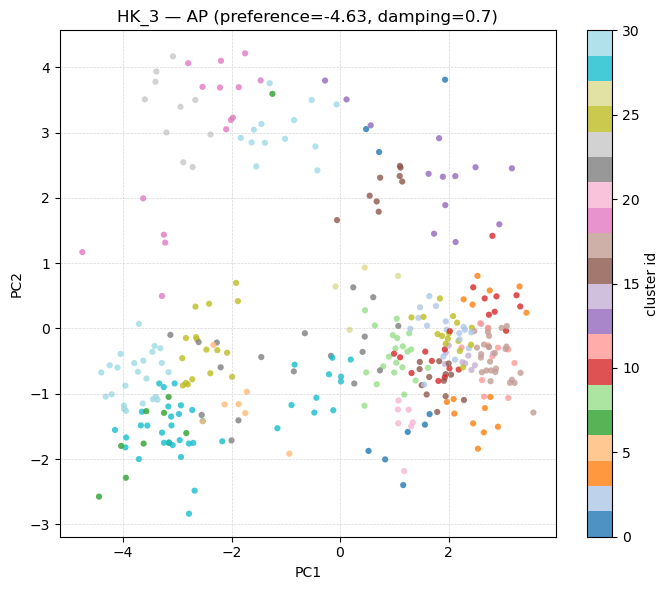

In [11]:
pref_to_plot = -4.627848	  # pick from the table above. we should plot all 4 and discuss what we see. 
detail = run_ap_grid(
    hk_studies.vdx,
    preferences=[pref_to_plot],
    dampings=[0.7],
    save_labels=True,
)

labels = detail.labels[(pref_to_plot, 0.7)]
cluster_scatter_2d(
    hk_studies.vdx,
    labels,
    title=f"HK_3 — AP (preference={pref_to_plot:.2f}, damping=0.7)",
)